In [50]:
import json
import pandas as pd
import pickle # to create file with msg
import matplotlib.pyplot as plt

## Table of contents
<br>

1. [Mint NFT - first analysis](#MintNFT)      
    1.1. [Background](#Background)    
    1.2. [Skin](#Skin)    
    1.3. [Shell](#Shell)    
    1.4. [Body](#Body)    
    1.5. [Mouth](#Mouth)    
    1.6. [Eyes](#Eyes)    
    1.7. [Head](#Head)       
2. [Mint NFT - check data](#Analysis)

In [2]:
json_file = open('database_terrapins.json')
data = json.load(json_file)

In [3]:
data = data['objects']

In [4]:
messages = [tx_1['tx']['value']['msg'] for tx_1 in data]

In [5]:
# data[1]

In [6]:
# messages[1]

In [7]:
N = len(messages)
new_m = []
y =[]
for i in range(0, N):
    if 'execute_msg' in [m['value'].keys() for m in messages[i]][0]:
        new_m.append(messages[i])
    else:
        del data[i]
    

In [8]:
len(new_m)

61048

In [9]:
# [tx_1['txhash'] for tx_1 in data]

In [10]:
# [tx_1['timestamp'] for tx_1 in data]|

In [11]:
# [m['type'] for m in messages[1]]

In [12]:
# [m['value']['execute_msg'] for m in messages[1]]

In [13]:
# data[0]

In [14]:
# messages[0]

In [15]:
# messages = [tx_1['tx']['value']['msg'] for tx_1 in data]

In [16]:
# lista = []

In [17]:
file_to_write = open("messeges.pickle", "ab")
counter = 0
for tx_i in data:
    messages_tx_i = {}
    messages_i = tx_i['tx']['value']['msg']
    timestamp = tx_i['timestamp']
    hash_id = tx_i['txhash']
    for msg in messages_i:
        if 'execute_msg' in msg['value'].keys():
            typeInfo = msg['type']
            exe_msg = msg['value']['execute_msg']
            dictObj = {'type' : typeInfo, 'hash_id': hash_id, 'exe_msg':exe_msg, 'timestamp':timestamp}
            pickle.dump(dictObj, file_to_write)
#             lista.append(dictObj)
            counter+=1

    

file_to_write.close()

In [3]:
counter = 135820

In [ ]:
# with open('messeges2.pkl', 'wb') as f:
#     for msg in lista:
#         pickle.dump(msg, f)
# f.close()

In [4]:
# unpickling file
with open('messeges.pickle', 'rb') as handle:
    all_messages = [pickle.load(handle) for k in range(counter)] # 135820 to jest liczba wszystkich transakcji, które się nadawają == counter 
handle.close()

In [20]:
all_messages[:11] # 10 pierwszych wpisów

[{'type': 'wasm/MsgExecuteContract',
  'hash_id': 'D6D438E97B4ACF2298726D3DC6694DB7CFBBBAEF1E82256D6BA9290221784A7F',
  'exe_msg': {'approve': {'spender': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
    'token_id': '85240393101615617026594634435762297133'}},
  'timestamp': '2021-10-19T06:46:55Z'},
 {'type': 'wasm/MsgExecuteContract',
  'hash_id': 'D6D438E97B4ACF2298726D3DC6694DB7CFBBBAEF1E82256D6BA9290221784A7F',
  'exe_msg': {'deposit': {'asset': {'info': {'nft': {'token_id': '85240393101615617026594634435762297133',
       'contract_addr': 'terra1f89xq3qhu98v4jch4y5xcrkhl9gytrne99x74t'}},
     'amount': '1'}}},
  'timestamp': '2021-10-19T06:46:55Z'},
 {'type': 'wasm/MsgExecuteContract',
  'hash_id': 'D6D438E97B4ACF2298726D3DC6694DB7CFBBBAEF1E82256D6BA9290221784A7F',
  'exe_msg': {'post_order': {'order': {'sig': [],
     'order': {'maker': [116,
       101,
       114,
       114,
       97,
       49,
       116,
       50,
       99,
       117,
       116,
       106,
       10

In [6]:
all_messages[99]

{'type': 'wasm/MsgExecuteContract',
 'hash_id': 'B75F64423DB44FF2FEBD6C70F368A3A4C8D7F2873F1F1A3D39C86CC79FB48FA2',
 'exe_msg': {'approve': {'spender': 'terra1eek0ymmhyzja60830xhzm7k7jkrk99a60q2z2t',
   'token_id': '125169659444137536670710076163614504492'}},
 'timestamp': '2021-10-19T05:37:20Z'}

In [17]:

# mint_nfts = []
# with open("mint_nfts.pickle", "ab") as file:
#     for msg in all_messages:
#         if "mint_nft" in msg['exe_msg'].keys():
#             mint_nfts.append(msg)
#             pickle.dump(msg, file)

In [9]:
with open("mint_nfts.pickle", "rb") as f:
    count = 10000
    mint_nfts = [pickle.load(f) for i in range(count)]
f.close()

In [22]:
mint_nfts[100]

{'type': 'wasm/MsgExecuteContract',
 'hash_id': '28A0DF8E88DCD7231E21848A8B09564C1CE8CF798869BF505DC8AF419E519AE4',
 'exe_msg': {'mint_nft': {'token_id': '228807376214261761132151677892526018862',
   'extension': {'name': 'Terrapin #05907',
    'image': 'ipfs://QmRjsHC9XnU1Sc3dMo5gcFHtdC41moc9dqSaY9io7QhVVq',
    'attributes': [{'value': 'Baby Yellow', 'trait_type': 'Background'},
     {'value': 'Unicorn', 'trait_type': 'Skin'},
     {'value': 'Dragon Wings - Red', 'trait_type': 'Shell'},
     {'value': 'Naked', 'trait_type': 'Body'},
     {'value': 'Dopey - Drool', 'trait_type': 'Mouth'},
     {'value': 'Bored Eyes - Shaved Brow', 'trait_type': 'Eyes'},
     {'value': 'Ramen', 'trait_type': 'Head'}],
    'description': 'Terrapins on Terra'},
   'token_uri': 'ipfs://QmbfNW2r5Mt4Azz7MAj7BztrcZ1snKuphScWWZr8E2wpUq',
   'reservation_id': 9898}},
 'timestamp': '2021-10-10T11:43:12Z'}

In [11]:
mint_nfts[0]['exe_msg']['mint_nft']['extension'].keys()

dict_keys(['name', 'image', 'attributes', 'description'])

In [307]:
columns = ['Name', 
           'Background', 
           'Skin', 
           'Shell', 
           'Body', 
           'Mouth', 
           'Eyes', 
           'Head', 
           'Token_ID']

In [308]:
mintNFT_df = pd.DataFrame(columns = columns)
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID


In [15]:
mint_nfts[0]['exe_msg']['mint_nft']['extension']['name']

'Terrapin #04880'

In [25]:
name = mint_nfts[0]['exe_msg']['mint_nft']['extension']['name']
token_id = mint_nfts[0]['exe_msg']['mint_nft']['token_id']
attributes = mint_nfts[0]['exe_msg']['mint_nft']['extension']['attributes']
attr_details = []
for attr in attributes:
    attr_details.append(attr['value'])

In [26]:
lista_mint0 = [name] + attr_details + [token_id]

In [30]:
mintNFT_df.loc[0] = lista_mint0

In [309]:
i = 0
for mint in mint_nfts:
    name = mint['exe_msg']['mint_nft']['extension']['name']
    token_id = mint['exe_msg']['mint_nft']['token_id']
    attributes = mint['exe_msg']['mint_nft']['extension']['attributes']
    attr_details = []
    for attr in attributes:
        attr_details.append(attr['value'])
    mintNFT_df.loc[i] = [name] + attr_details + [token_id]
    i+=1

In [310]:
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky Hair - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base Shell,Naked,Snarl,Tweeker Eyes,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored Eyes,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base Shell,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls Hair - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base Shell,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky Hair - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base Shell,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker Eyes,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base Shell,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


In [313]:
mintNFT_df['Shell'] = mintNFT_df['Shell'].str.replace(' Shell', '')

In [314]:
mintNFT_df['Eyes'] = mintNFT_df['Eyes'].str.replace(' Eyes', '')
mintNFT_df['Head'] = mintNFT_df['Head'].str.replace(' Hair', '')

In [315]:
mintNFT_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


# MintNFT

In [316]:
mintNFT_df.to_csv('mints_data.csv', index=False)

In [317]:
mintNFT = pd.read_csv('mints_data.csv')

In [318]:
mintNFT

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Token_ID
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,21115668659623778144848103954867683887
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,339686573371205809325137876315247034028
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,26845686848091010612034591826243939022
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,29725014212231427076011833295205785773
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,208630217786676767860015082049195109707
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,140850908578020633267983016681440335825
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,198469524447758964403111579286542946696
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,7349082768268168848355752264853030978
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,207748826621535591411786181607822466045


## Background

In [319]:
mintNFT['Background'].value_counts()

Mint                        1516
Blue Grey                   1511
Purple                      1028
Steel Blue                   976
Early Light                  965
Baby Yellow                  520
Charcoal Full Moon           513
Neon Pink                    513
Lilac                        511
Burnt Orange                 495
Baby Blue                    478
Blood Red - Big Moon         311
Midnight Blue - Big Moon     299
Clouds                       185
Charcoal - Big Moon          178
Genesis                        1
Name: Background, dtype: int64

In [320]:
background_set = dict(mintNFT['Background'].value_counts())

backgrounds = list(background_set.keys())
countBackground = list(background_set.values())

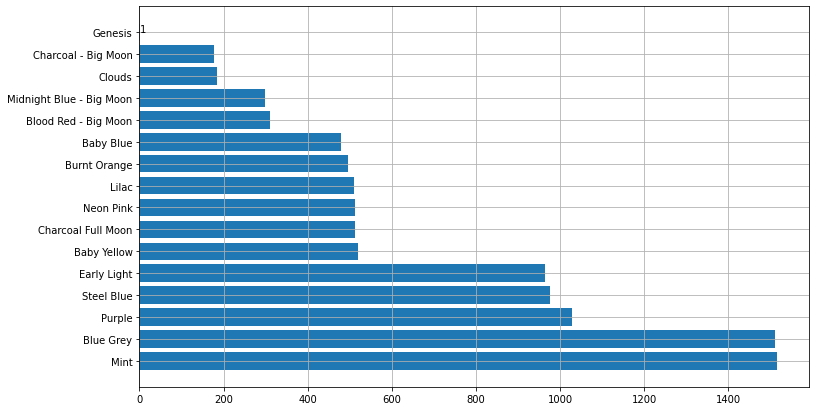

In [321]:
plt.figure(figsize=(12, 7))
plt.barh(backgrounds, countBackground)
plt.text(1, 15, str(1))
plt.grid()
# plt.annotate('1', (1, 15))

The most popular backgrounds are **Mint** and **Blue Grey**. The difference between these two and the color on the third place is significant - 483.
The interesting thing is that the difference between the first five colors and the rest is huge. As wee can see the sixth place is twice times smaller than the first. 

Also we have unique value in our dataset. The background ** $Genesis$ ** appears only once on 10 000 records.

In [379]:
# background_set = dict(mintNFT['Background'].value_counts())

background_df = pd.DataFrame(columns=['Background', 'Count'])
background_df['Background'] = list(background_set.keys())
background_df['Count'] = list(background_set.values())

background_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
background_df['Count [%]'] = background_df['Count'].div(100)
background_df = background_df.drop(['Count'], axis=1)

In [380]:
background_df

,Background,Count [%]
0,Mint,15.16
1,Blue Grey,15.11
2,Purple,10.28
3,Steel Blue,9.76
4,Early Light,9.65
5,Baby Yellow,5.20
6,Charcoal Full Moon,5.13
7,Neon Pink,5.13
8,Lilac,5.11
9,Burnt Orange,4.95


## Skin

In [322]:
skin_set = dict(mintNFT['Skin'].value_counts())

skins = list(skin_set.keys())
countSkin = list(skin_set.values())

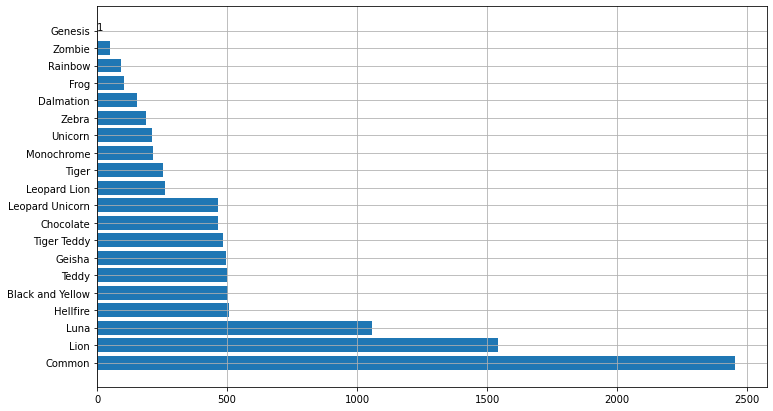

In [323]:
plt.figure(figsize=(12, 7))
plt.barh(skins, countSkin)
plt.text(1, 19, str(1))
plt.grid()
# plt.annotate('1', (1, 15))

In [383]:
skin_df = pd.DataFrame(columns=['Skin', 'Count'])
skin_df['Skin'] = list(skin_set.keys())
skin_df['Count'] = list(skin_set.values())

skin_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
skin_df['Count [%]'] = skin_df['Count'].div(100)
skin_df = skin_df.drop('Count', axis=1)

In [384]:
skin_df

,Skin,Count [%]
0,Common,24.52
1,Lion,15.41
2,Luna,10.59
3,Hellfire,5.08
4,Black and Yellow,5.02
5,Teddy,5.00
6,Geisha,4.94
7,Tiger Teddy,4.85
8,Chocolate,4.65
9,Leopard Unicorn,4.64


## Shell

In [324]:
shell_set = dict(mintNFT['Shell'].value_counts())

shells = list(shell_set.keys())
countShell = list(shell_set.values())

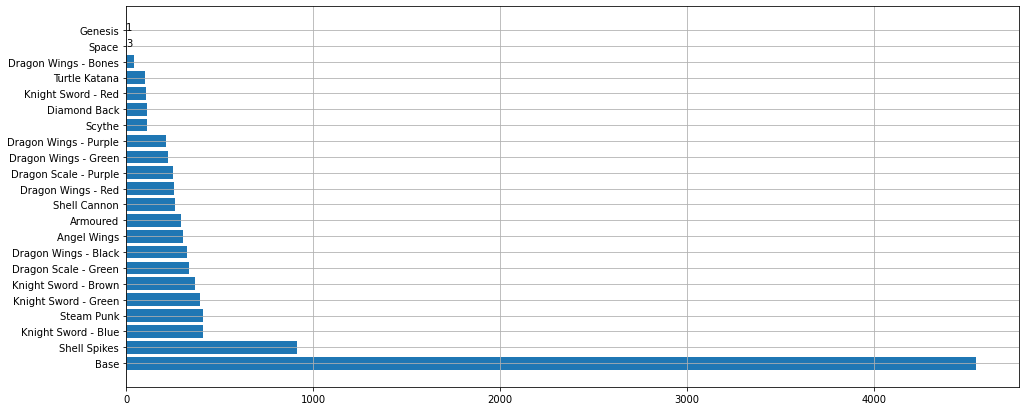

In [325]:
plt.figure(figsize=(16, 7))

plt.barh(shells, countShell)

for index, value in enumerate(countShell):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [386]:
shell_df = pd.DataFrame(columns=['Shell', 'Count'])
shell_df['Shell'] = list(shell_set.keys())
shell_df['Count'] = list(shell_set.values())

shell_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
shell_df['Count [%]'] = shell_df['Count'].div(100)
shell_df = shell_df.drop('Count', axis=1)
shell_df

,Shell,Count [%]
0,Base,45.47
1,Shell Spikes,9.15
2,Knight Sword - Blue,4.14
3,Steam Punk,4.12
4,Knight Sword - Green,3.96
5,Knight Sword - Brown,3.67
6,Dragon Scale - Green,3.34
7,Dragon Wings - Black,3.28
8,Angel Wings,3.05
9,Armoured,2.94


## Body

In [326]:
body_set = dict(mintNFT['Body'].value_counts())

bodies = list(body_set.keys())
countBody = list(body_set.values())

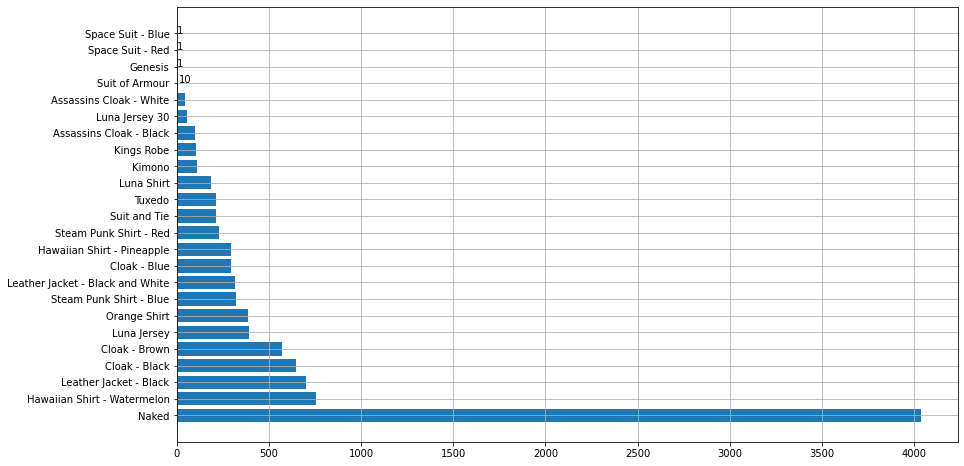

In [327]:
plt.figure(figsize=(14, 8))
plt.barh(bodies, countBody)
for index, value in enumerate(countBody):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [388]:
Body_df = pd.DataFrame(columns=['Body', 'Count'])
Body_df['Body'] = list(body_set.keys())
Body_df['Count'] = list(body_set.values())

Body_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Body_df['Count [%]'] = Body_df['Count'].div(100)
Body_df = Body_df.drop('Count', axis=1)

In [389]:
Body_df

,Body,Count [%]
0,Naked,40.34
1,Hawaiian Shirt - Watermelon,7.55
2,Leather Jacket - Black,7.00
3,Cloak - Black,6.49
4,Cloak - Brown,5.72
5,Luna Jersey,3.92
6,Orange Shirt,3.85
7,Steam Punk Shirt - Blue,3.24
8,Leather Jacket - Black and White,3.16
9,Cloak - Blue,2.97


## Mouth

In [328]:
mouth_set = dict(mintNFT['Mouth'].value_counts())

mouths = list(mouth_set.keys())
countMouth = list(mouth_set.values())

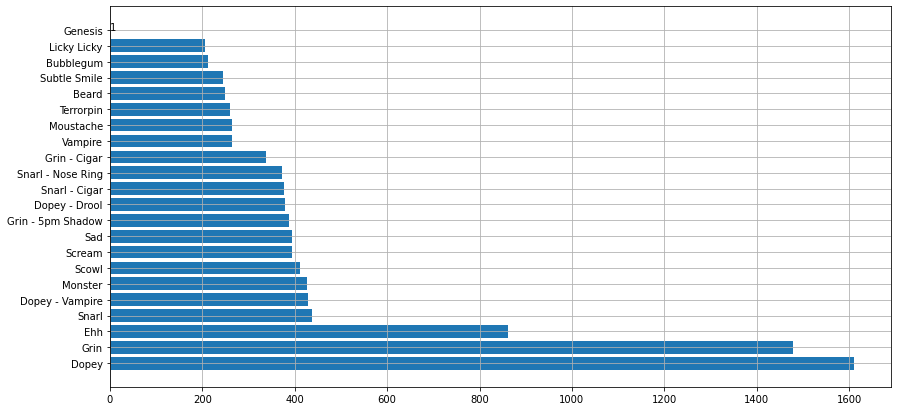

In [329]:
plt.figure(figsize=(14,7))
plt.barh(mouths, countMouth)

for index, value in enumerate(countMouth):
    if value <= 10:
        plt.text(value, index, str(value))
        
plt.grid()

In [390]:
Mouth_df = pd.DataFrame(columns=['Mouth', 'Count'])
Mouth_df['Mouth'] = list(mouth_set.keys())
Mouth_df['Count'] = list(mouth_set.values())

Mouth_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Mouth_df['Count [%]'] = Mouth_df['Count'].div(100)
Mouth_df = Mouth_df.drop('Count', axis=1)
Mouth_df

,Mouth,Count [%]
0,Dopey,16.10
1,Grin,14.78
2,Ehh,8.61
3,Snarl,4.37
4,Dopey - Vampire,4.29
5,Monster,4.26
6,Scowl,4.11
7,Scream,3.95
8,Sad,3.94
9,Grin - 5pm Shadow,3.87


## Eyes 

### - można dodać to że mamy dwa atrybuty dla oczu

In [330]:
eyes_set = dict(mintNFT['Eyes'].value_counts())

eyes = list(eyes_set.keys())
countEyes = list(eyes_set.values())

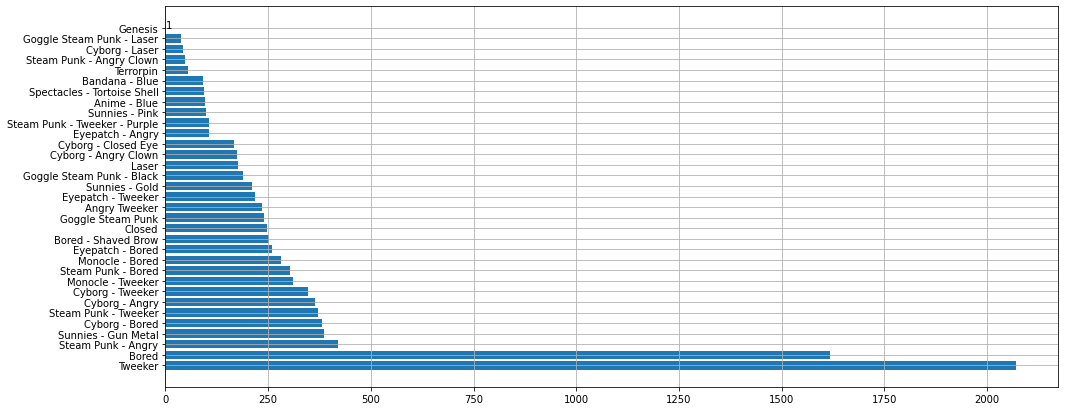

In [331]:
plt.figure(figsize=(16, 7))

plt.barh(eyes, countEyes)

for index, value in enumerate(countEyes):
    if value <= 10:
        plt.text(value, index, str(value))
plt.grid()

In [392]:
Eyes_df = pd.DataFrame(columns=['Eyes', 'Count'])
Eyes_df['Eyes'] = list(eyes_set.keys())
Eyes_df['Count'] = list(eyes_set.values())

Eyes_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
Eyes_df['Count [%]'] = Eyes_df['Count'].div(100)
Eyes_df = Eyes_df.drop('Count', axis=1)
Eyes_df

,Eyes,Count [%]
0,Tweeker,20.70
1,Bored,16.17
2,Steam Punk - Angry,4.21
3,Sunnies - Gun Metal,3.85
4,Cyborg - Bored,3.80
5,Steam Punk - Tweeker,3.72
6,Cyborg - Angry,3.65
7,Cyborg - Tweeker,3.46
8,Monocle - Tweeker,3.11
9,Steam Punk - Bored,3.04


## Head

In [332]:
head_set = dict(mintNFT['Head'].value_counts())

heads = list(head_set.keys())
countHead = list(head_set.values())

In [333]:
# plt.figure(figsize=(16, 7))

# plt.barh(heads, countHead)

# for index, value in enumerate(countHead):
#     if value <= 10:
#         plt.text(value, index, str(value))
# plt.grid()

In [334]:
# len(mintNFT['Head'].value_counts())

In [429]:
Colors = []
Forms = []
for head in heads:
    
    words = head.split(' - ')
    countWords = len(words)
    
    if (len(head.split(' ')) == 1 and countWords == 1):
        Forms.append(words[0])
        
    elif countWords == 1:
        Forms.append(words[0])
        
    elif countWords == 2:
        form, color = words
        Colors.append(color)
        Forms.append(form)
        
    else:
        form, color, add = words
        
        Colors.append(color)
        Forms.append(form+' '+add)

In [430]:
headColors = {}
headForms = {}
for head in head_set:
    for color in Colors:
        if color.lower() in head.lower():
            if color.lower() in headColors.keys():
                headColors[color.lower()] += head_set[head]
            else:
                headColors[color.lower()] = head_set[head]
    
    for form in Forms:
        if form in head:
            if form in headForms.keys():
                headForms[form] += head_set[head]
            else:
                headForms[form] = head_set[head]

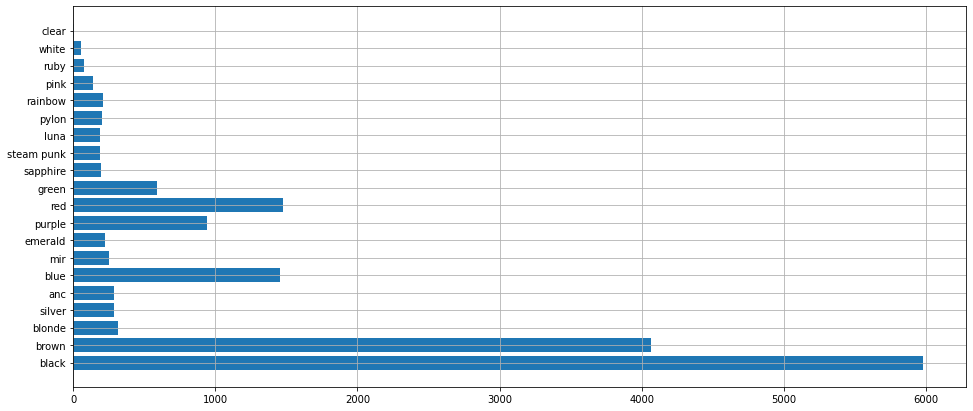

In [431]:
x_axis = list(headColors.keys())
y_axis = list(headColors.values())


plt.figure(figsize=(16, 7))
plt.barh(x_axis, y_axis)
plt.grid()

In [453]:
headColors_df = pd.DataFrame(columns=['color', 'count'])
headColors_df['color'] = x_axis
headColors_df['count'] = y_axis

In [454]:

headColors_df['Count [%]'] = headColors_df['count'].div(100)
headColors_df = headColors_df.drop('count', axis=1)
headColors_df.sort_values(by=['Count [%]'], ascending=False).reset_index(drop=True)
headColors_df

,color,Count [%]
0,black,59.80
1,brown,40.68
2,blonde,3.18
3,silver,2.90
4,anc,2.90
5,blue,14.55
6,mir,2.54
7,emerald,2.23
8,purple,9.39
9,red,14.76


In [436]:
x_axisF = list(headColors.keys())
y_axisF = list(headColors.values())

In [446]:
headForms_df = pd.DataFrame(columns=['Form', 'Count'])
headForms_df['Form'] = x_axisF
headForms_df['Count'] = y_axisF

In [447]:
headForms_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
headForms_df['Count [%]'] = headForms_df['Count'].div(100)
headForms_df = headForms_df.drop('Count', axis=1)
headForms_df

,Form,Count [%]
0,black,59.80
1,brown,40.68
2,blonde,3.18
3,silver,2.90
4,anc,2.90
5,blue,14.55
6,mir,2.54
7,emerald,2.23
8,purple,9.39
9,red,14.76


# Analysis

Let's define situation when some of the traits are not specified. In our dataset we are not able to use "None" because all of the attributes are kinda defined. But after reseraching we can say that traits are not specified if:
- Shell is a **Base Shell**
- Head is **None**
- Body is **Naked**
- Skin is **Common**

For $Eyes$, $Mouth$ and $Background$ we are not able to unambiguously decide which one of decribptions are neutral and are "undefined". That's why in our analysis we will be using only those four attributes.

In [342]:
attributes = mintNFT

In [343]:
basicTraits = ["Base", "None", "Naked","Common"]
definedAttributesPerRow = []

In [344]:
attributes_temp = mintNFT[[
           'Background', 
           'Skin', 
           'Shell', 
           'Body', 
           'Mouth', 
           'Eyes', 
           'Head']].values.tolist()

In [345]:
c = attributes.iloc[[0]].values.tolist()
# dict(c)
c

[['Terrapin #04880',
  'Mint',
  'Geisha',
  'Knight Sword - Brown',
  'Naked',
  'Snarl - Cigar',
  'Cyborg - Closed Eye',
  'Spiky - Brown',
  '21115668659623778144848103954867683887']]

In [346]:
basicSkin = 0
basicBody = 0
basicShell = 0
basicHead = 0

for attr_i in attributes_temp:
    definedRows = 3
    for basic in basicTraits:
        if basic not in attr_i:
            definedRows+=1
        elif basic == basicTraits[0]:
            basicShell +=1
        elif basic == basicTraits[1]:
            basicHead +=1
        elif basic == basicTraits[2]:
            basicBody += 1
        else:
            basicSkin +=1
    definedAttributesPerRow.append(definedRows)

In [347]:
attributes['Defined_Rows'] = definedAttributesPerRow

In [356]:
definedRows_set = dict(attributes['Defined_Rows'].value_counts())
values = list(definedRows_set.values())
labels = list(definedRows_set.keys())
labels = ['6 attributes', '7 attributes', '5 attributes', '4 attributes', '3 attributes']


([<matplotlib.patches.Wedge at 0x7fab5386e850>,
 [Text(0.22374277442564774, 1.077004721852376, '6 attributes'),
  Text(-0.9855389058445421, -0.4885827105687869, '7 attributes'),
  Text(0.4929125785704812, -0.9833804909021734, '5 attributes'),
  Text(1.0752142417846344, -0.2321946042945317, '4 attributes'),
  Text(1.0999174363096664, -0.01347713997743173, '3 attributes')],
 [Text(0.12204151332308058, 0.5874571210103868, '43.48%'),
  Text(-0.5375666759152047, -0.26649966031024735, '27.69%'),
  Text(0.26886140649298973, -0.5363893586739127, '22.45%'),
  Text(0.5864804955188914, -0.12665160234247183, '5.99%'),
  Text(0.599954965259818, -0.007351167260417306, '0.39%')])

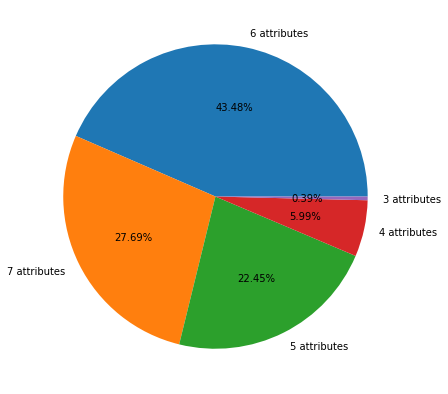

In [357]:
plt.figure(figsize=(12,7))
plt.pie(values, autopct='%0.2f%%', labels = labels)

As we can see the the majority of Nft's has not defined a least one trait. Only 0.39% of all NFT's have defined only 3 attributes. This observation is really interesting because we can have a proof that the varity of our dataset isn't small.

([<matplotlib.patches.Wedge at 0x7fab53898760>,
 [Text(-0.6662844481345152, 0.8752514119806291, 'missing Skin'),
  Text(-0.76559734557703, -0.7898485325968556, 'missing Body'),
  Text(1.0977792607108126, -0.06986196929104051, 'missing Shell'),
  Text(0.23347829312642657, 1.0749362244518372, 'missing Head')],
 [Text(-0.3634278808006446, 0.47740986108034306, '20.71%'),
  Text(-0.4175985521329254, -0.43082647232555754, '34.07%'),
  Text(0.5987886876604431, -0.038106528704203904, '38.41%'),
  Text(0.1273517962507781, 0.5863288497010021, '6.81%')])

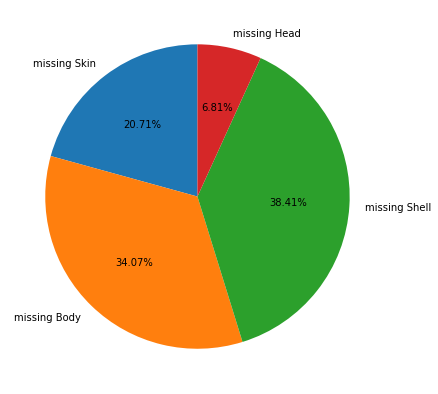

In [355]:
counts  = [basicSkin,
basicBody,
basicShell,
basicHead]
labelsMissed = ['missing Skin', 'missing Body', 'missing Shell', 'missing Head']

plt.figure(figsize=(16, 7))
plt.pie(counts, labels = labelsMissed, autopct='%0.02f%%',  startangle=90)

In our dataset we can see that the most missing attribute is **Shell**. That's mean ~38% of checked NFT's have the same attribute Shell. At the second place is $Body$ - ~34%. 

This comparison helped to make following observations:
 - Attribute Shell and Body are the least varied attributes. In the previous section we were able to see that for these two characteristics we have many choices but as we can see 38% of those NFT's have the same Shell and 34% - the same Body.
 - 

## N-grams

In [473]:
n_Grams_df = attributes.drop(['Token_ID', 'Defined_Rows'], axis=1)
n_Grams_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Attribute_Phrase
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,Mint; Geisha; Knight Sword - Brown; Naked; Sna...
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,Mint; Lion; Base; Naked; Snarl; Tweeker; Mohaw...
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,Blue Grey; Geisha; Diamond Back; Steam Punk Sh...
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,Lilac; Common; Base; Leather Jacket - Black an...
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,Mint; Lion; Base; Leather Jacket - Black and W...
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,Charcoal Full Moon; Tiger Teddy; Shell Spikes;...
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,Early Light; Common; Base; Hawaiian Shirt - Pi...
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,Midnight Blue - Big Moon; Tiger Teddy; Angel W...
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,Mint; Tiger; Base; Naked; Dopey; Eyepatch - Bo...


In [474]:
attrPhrases = []
for attr_i in attributes_temp:
    Background, Skin, Shell, Body, Mouth, Eyes, Head = attr_i
    attributePhrase = '{}; {}; {}; {}; {}; {}; {}'.format(Background, Skin, Shell, Body, Mouth, Eyes, Head)
    attrPhrases.append(attributePhrase)

In [475]:
'{}; {}; {}; {}; {}; {}; {}'.format(a, b, c, d, e, f, g )

'Mint; Geisha; Knight Sword - Brown; Naked; Snarl - Cigar; Cyborg - Closed Eye; Spiky - Brown'

In [476]:
n_Grams_df['Attribute_Phrase'] = attrPhrases

In [477]:
n_Grams_df

,Name,Background,Skin,Shell,Body,Mouth,Eyes,Head,Attribute_Phrase
0,Terrapin #04880,Mint,Geisha,Knight Sword - Brown,Naked,Snarl - Cigar,Cyborg - Closed Eye,Spiky - Brown,Mint; Geisha; Knight Sword - Brown; Naked; Sna...
1,Terrapin #09271,Mint,Lion,Base,Naked,Snarl,Tweeker,Mohawk - Black,Mint; Lion; Base; Naked; Snarl; Tweeker; Mohaw...
2,Terrapin #00735,Blue Grey,Geisha,Diamond Back,Steam Punk Shirt - Red,Grin - 5pm Shadow,Monocle - Bored,None,Blue Grey; Geisha; Diamond Back; Steam Punk Sh...
3,Terrapin #08213,Lilac,Common,Base,Leather Jacket - Black and White,Dopey,Eyepatch - Bored,Girls - Brown,Lilac; Common; Base; Leather Jacket - Black an...
4,Terrapin #03821,Mint,Lion,Base,Leather Jacket - Black and White,Grin - 5pm Shadow,Eyepatch - Angry,Pylon Helmet,Mint; Lion; Base; Leather Jacket - Black and W...
...,...,...,...,...,...,...,...,...,...
9995,Terrapin #00146,Charcoal Full Moon,Tiger Teddy,Shell Spikes,Naked,Terrorpin,Steam Punk - Tweeker,Spiky - Black,Charcoal Full Moon; Tiger Teddy; Shell Spikes;...
9996,Terrapin #00147,Early Light,Common,Base,Hawaiian Shirt - Pineapple,Moustache,Cyborg - Bored,Lion Hat,Early Light; Common; Base; Hawaiian Shirt - Pi...
9997,Terrapin #00148,Midnight Blue - Big Moon,Tiger Teddy,Angel Wings,Naked,Dopey,Angry Tweeker,Lion Hat,Midnight Blue - Big Moon; Tiger Teddy; Angel W...
9998,Terrapin #00149,Mint,Tiger,Base,Naked,Dopey,Eyepatch - Bored,Lion Hat,Mint; Tiger; Base; Naked; Dopey; Eyepatch - Bo...


In [483]:
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS as sklear_stopwords

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

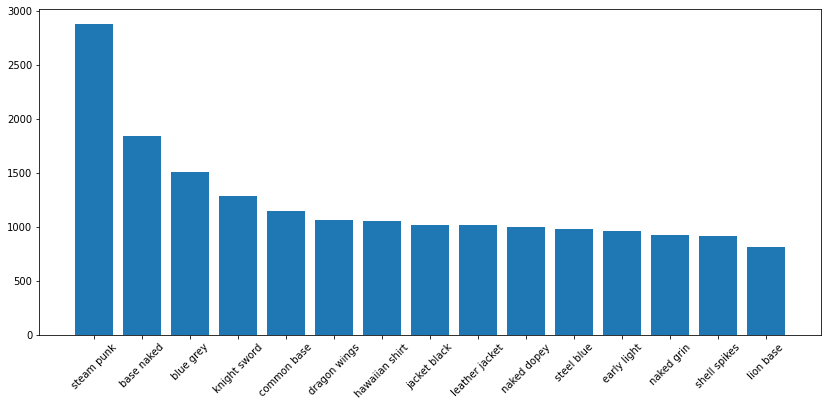

In [495]:
all_sw = list(sklear_stopwords)
bigram_vectorizer = CountVectorizer(stop_words = all_sw, max_features=15, ngram_range=(2,2))
fit = bigram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

bi_counts = pd.DataFrame({'word':bigram_vectorizer.get_feature_names(), 'count':fit.sum(axis=0).tolist()[0]})
bi_counts = bi_counts.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# plt.grid()
plt.figure(figsize=(14,6))
plt.bar(bi_counts['word'], bi_counts['count'])
plt.xticks(rotation=45)





<BarContainer object of 15 artists>

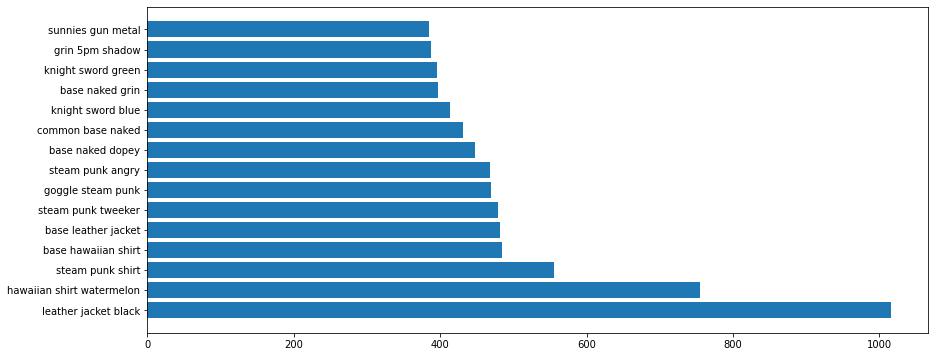

In [498]:
all_sw = list(sklear_stopwords)
trigram_vectorizer = CountVectorizer(stop_words = all_sw, max_features=15, ngram_range=(3,3))
fit = trigram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

tri_counts = pd.DataFrame({'word':trigram_vectorizer.get_feature_names(), 'count':fit.sum(axis=0).tolist()[0]})
tri_counts = tri_counts.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# plt.grid()
plt.figure(figsize=(14,6))
plt.barh(tri_counts['word'], tri_counts['count'])
# plt.xticks(rotation=90)





In [499]:
counts

,word,count
0,leather jacket black,1016
1,hawaiian shirt watermelon,755
2,steam punk shirt,556
3,base hawaiian shirt,485
4,base leather jacket,482
5,steam punk tweeker,479
6,goggle steam punk,469
7,steam punk angry,468
8,base naked dopey,447
9,common base naked,431


<BarContainer object of 15 artists>

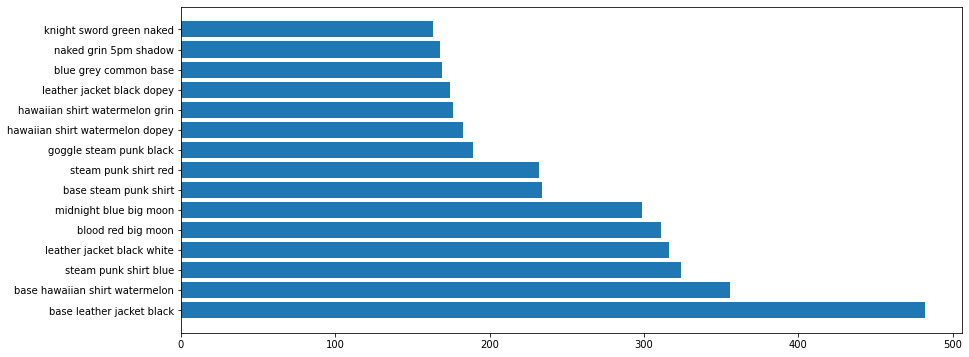

In [501]:
all_sw = list(sklear_stopwords)
fourgram_vectorizer = CountVectorizer(stop_words = all_sw, max_features=15, ngram_range=(4,4))
fit = fourgram_vectorizer.fit_transform(n_Grams_df['Attribute_Phrase'])

four_grams = pd.DataFrame({'word':fourgram_vectorizer.get_feature_names(), 'count':fit.sum(axis=0).tolist()[0]})
four_grams = four_grams.sort_values(by=['count'], ascending=False).reset_index(drop=True)

# plt.grid()
plt.figure(figsize=(14,6))
plt.barh(four_grams['word'], four_grams['count'])
# plt.xticks(rotation=90)



